Simulatin normal random variables with varying degree of correlation for estimation decision errors in case of proxy variables, i.e. substitutions.

Options
1. https://oscarnieves100.medium.com/simulating-correlated-random-variables-in-python-c3947f2dbb10
- Use a transformation: X=mx+sx*S1, Y=my+sy*(p*S1+sqrt(1-p^2)*S2), where S1 and S2 are independent standard normal random variables.
2. Although the logic (provable) in the above transformation is correct, the straightforward implementation can be achieved with a multivariate normal based on a specified vector mean and covariance matrix (parametrised by sigamas and correlation coefficient).

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Generate multivariate normal with various degrees of correlation

def generate_correlated_normal(mu_X, sigma_X, mu_Y, sigma_Y, rxy, size=1000):
    mean = [mu_X, mu_Y]
    covariance_matrix = [[sigma_X**2, rxy*sigma_X*sigma_Y], [rxy*sigma_X*sigma_Y, sigma_Y**2]]
    return np.random.multivariate_normal(mean, covariance_matrix, size=size)

Generate and estimate error probabilities. Assume
- X is a proxy for Y.
- q(X*) = q(Y*) = q*

First for one example

In [33]:
q_star = 0.25
rxy = 0.2

# Simulate the data
data = generate_correlated_normal(0, 1, 0, 1, rxy, size=100000)

# Count FP and FN
fp_rate = np.sum((data[:, 0] > q_star) & (data[:, 1] < q_star)) / data.shape[0]
fn_rate = np.sum((data[:, 0] < q_star) & (data[:, 1] > q_star)) / data.shape[0]

(0.20883, 0.21031)

For combinations

Text(0.5, 0.98, 'Error rates for various q* and rxy')

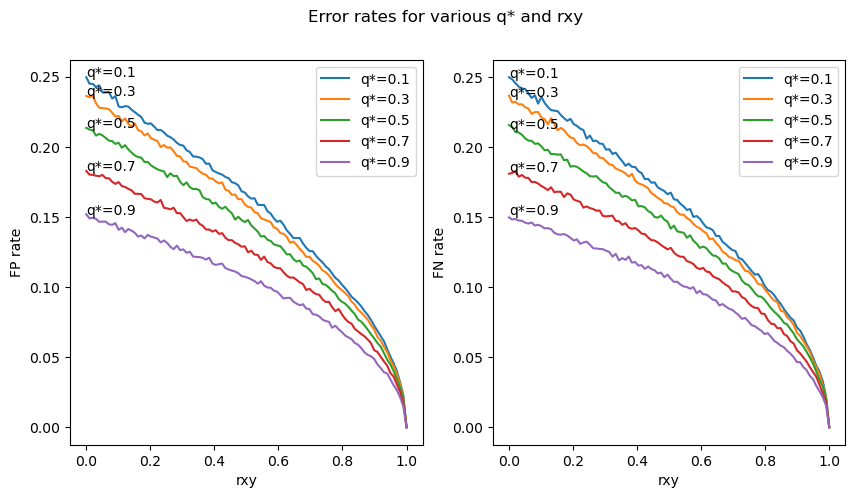

In [44]:
q_stars = [0.1, 0.3, 0.5, 0.7, 0.9]
rxys = np.linspace(0, 1, 100)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for q_star in q_stars:
    fp_rates = []
    fn_rates = []
    for rxy in rxys:
        data = generate_correlated_normal(0, 1, 0, 1, rxy, size=100000)
        fp_rate = np.sum((data[:, 0] > q_star) & (data[:, 1] < q_star)) / data.shape[0]
        fn_rate = np.sum((data[:, 0] < q_star) & (data[:, 1] > q_star)) / data.shape[0]
        fp_rates.append(fp_rate)
        fn_rates.append(fn_rate)
    axs[0].plot(rxys, fp_rates, label=f"q*={q_star}")
    axs[0].text(rxys[0], fp_rates[0], f"q*={q_star}")
    axs[1].plot(rxys, fn_rates, label=f"q*={q_star}")
    axs[1].text(rxys[0], fp_rates[0], f"q*={q_star}")

for ax_i in axs:
    ax_i.set_xlabel("rxy")
    ax_i.legend()

axs[0].set_ylabel("FP rate")
axs[1].set_ylabel("FN rate")

fig.suptitle("Error rates for various q* and rxy")

Fig. 5. Same logic as above, but with difference in q(X*) and q(Y*).

Text(0.5, 0.98, 'Error rates for various q(X*) =/= q(Y*) and rxy')

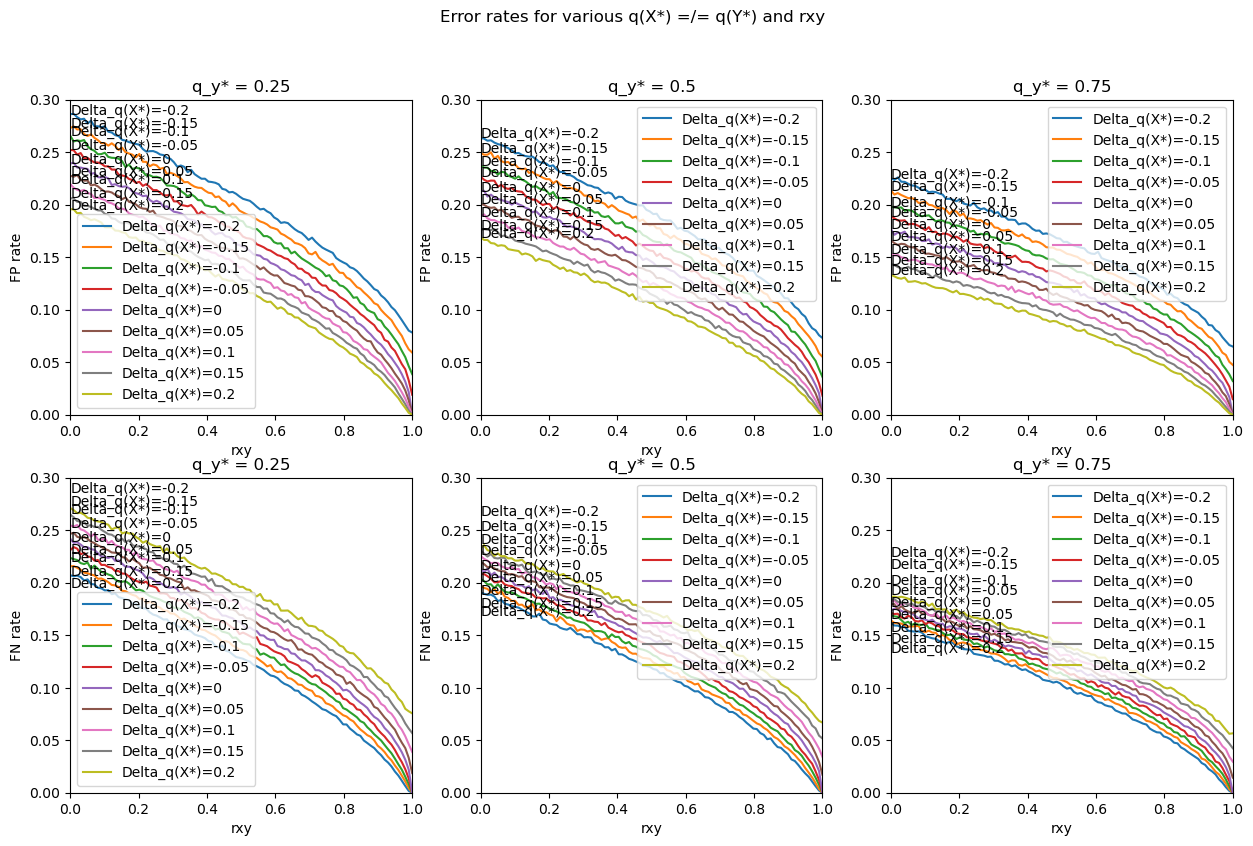

In [50]:
q_y_stars = [0.25, 0.5, 0.75]
q_x_deltas = [-0.2, -0.15, -0.1, -0.05, 0, 0.05, 0.1, 0.15, 0.2]
rxys = np.linspace(0, 1, 100)

fig, axs = plt.subplots(2, 3, figsize=(15, 9))

for i, q_y_star in enumerate(q_y_stars):
    for j, q_x_delta in enumerate(q_x_deltas):
        
        q_x_star = q_y_star + q_x_delta
        
        fp_rates = []
        fn_rates = []
        for rxy in rxys:
            
            data = generate_correlated_normal(0, 1, 0, 1, rxy, size=100000)
            
            # Assume X is col 0 and Y is col 1
            fp_rate = np.sum((data[:, 0] > q_x_star) & (data[:, 1] < q_y_star)) / data.shape[0]
            fn_rate = np.sum((data[:, 0] < q_x_star) & (data[:, 1] > q_y_star)) / data.shape[0]
            
            fp_rates.append(fp_rate)
            fn_rates.append(fn_rate)
        axs[0][i].plot(rxys, fp_rates, label=f"Delta_q(X*)={q_x_delta}")
        axs[0][i].text(rxys[0], fp_rates[0], f"Delta_q(X*)={q_x_delta}")
        axs[1][i].plot(rxys, fn_rates, label=f"Delta_q(X*)={q_x_delta}")
        axs[1][i].text(rxys[0], fp_rates[0], f"Delta_q(X*)={q_x_delta}")

for i in range(2):
    for j in range(3):
        axs[i][j].set_title(f"q_y* = {q_y_stars[j]}")
        if i == 0:
            axs[i][j].set_ylabel("FP rate")
        else:
            axs[i][j].set_ylabel("FN rate")
        
        axs[i][j].set_xlabel("rxy")    
        axs[i][j].set_xlim(0, 1)
        axs[i][j].set_ylim(0, 0.3)

        axs[i][j].legend()


fig.suptitle("Error rates for various q(X*) =/= q(Y*) and rxy")